In [1]:
#import the necessary modules
import pandas as pd
import numpy as np

#read the dataset into dataframe
df = pd.read_csv(r'X:\Downloads\PRG4206 Machine Learning\Group\depress.csv')

print("\nDataframe: \n{}".format(df))
print("\nSize of our data: {}".format(df.shape))



Dataframe: 
      Survey_id  Ville_id  sex  Age  Married  Number_children  \
0           926        91    1   28        1                4   
1           747        57    1   23        1                3   
2          1190       115    1   22        1                3   
3          1065        97    1   27        1                2   
4           806        42    0   59        0                4   
...         ...       ...  ...  ...      ...              ...   
1424        255        22    1   25        1                1   
1425        547        69    1   28        1                4   
1426        893       184    1   66        0                0   
1427        363        75    1   51        1                1   
1428        231        12    1   33        0                4   

      education_level  total_members  gained_asset  durable_asset  ...  \
0                  10              5      28912201       22861940  ...   
1                   8              5      28912201       2

In [2]:
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [3]:
#preprocessing data
#take out rows with null values
df = df.dropna()

In [4]:
#separate into Data (features only) and Target (our goal)
data = df.drop(columns=['depressed'])  #features only. remove the target column
target = df['depressed'].values   #the target only aka 'depressed or not?'

print(data)

      Survey_id  Ville_id  sex  Age  Married  Number_children  \
0           926        91    1   28        1                4   
1           747        57    1   23        1                3   
2          1190       115    1   22        1                3   
3          1065        97    1   27        1                2   
4           806        42    0   59        0                4   
...         ...       ...  ...  ...      ...              ...   
1424        255        22    1   25        1                1   
1425        547        69    1   28        1                4   
1426        893       184    1   66        0                0   
1427        363        75    1   51        1                1   
1428        231        12    1   33        0                4   

      education_level  total_members  gained_asset  durable_asset  ...  \
0                  10              5      28912201       22861940  ...   
1                   8              5      28912201       22861940  ... 

In [5]:
#split the dataset into 70% training 30% testing
from sklearn.model_selection import train_test_split

#test_size=0.3 means 30% of data goes into testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

print("Shape of X_test: {}".format(X_test.shape))
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_test: {}".format(y_test.shape))
print("Shape of y_train: {}".format(y_train.shape))

Shape of X_test: (423, 22)
Shape of X_train: (986, 22)
Shape of y_test: (423,)
Shape of y_train: (986,)


In [6]:
#build random forest classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100, random_state=0)

#fit the training data into the model
rf_clf.fit(X_train, y_train)

print ("Accuracy on training set: ", (rf_clf. score(X_train, y_train)))
print ("Accuracy on testing set: ", (rf_clf. score (X_test, y_test)))

Accuracy on training set:  1.0
Accuracy on testing set:  0.8439716312056738


In [7]:
#use the forest's predict method on the test data
prediction = rf_clf.predict(X_test)

print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
#import scikit-learn metrics module for accuracy testing
from sklearn import metrics

#model accuracy, how often is the classifier correct?
#compare predicted values to the actual target value in y test set

print("Accuracy: ", metrics.accuracy_score(y_test, prediction))

Accuracy:  0.8439716312056738


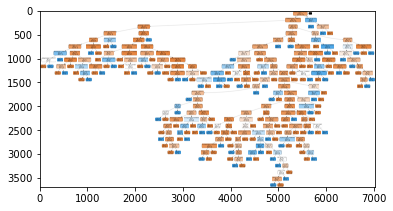

In [9]:
from sklearn.tree import export_graphviz
import pydot
import pydotplus

feature_list = list(data.columns)

tree = rf_clf.estimators_[5]

export_graphviz(tree, out_file = "tree.dot", filled = True, feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('RandomForest.png')

#display the image
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
img=pltimg.imread('RandomForest.png')
imgplot = plt.imshow(img)
plt.show()

In [10]:
#Evaluation metrics
#Constructing the confusion matrix.
from sklearn. metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[354,   1],
       [ 65,   3]], dtype=int64)

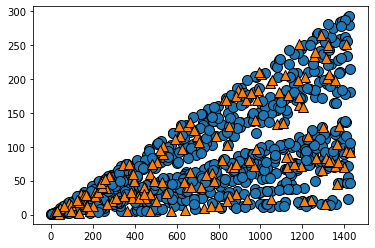

In [11]:
import mglearn

mglearn.discrete_scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train)

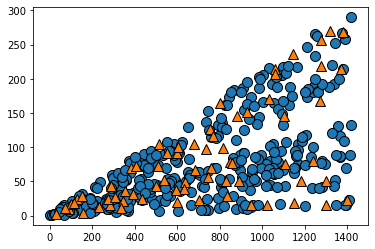

In [12]:
mglearn.discrete_scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test)

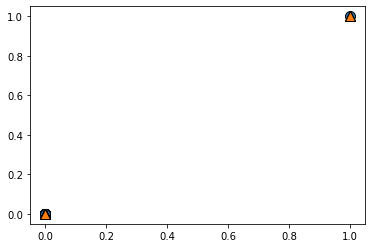

In [13]:
mglearn.discrete_scatter(prediction, prediction, y_test)

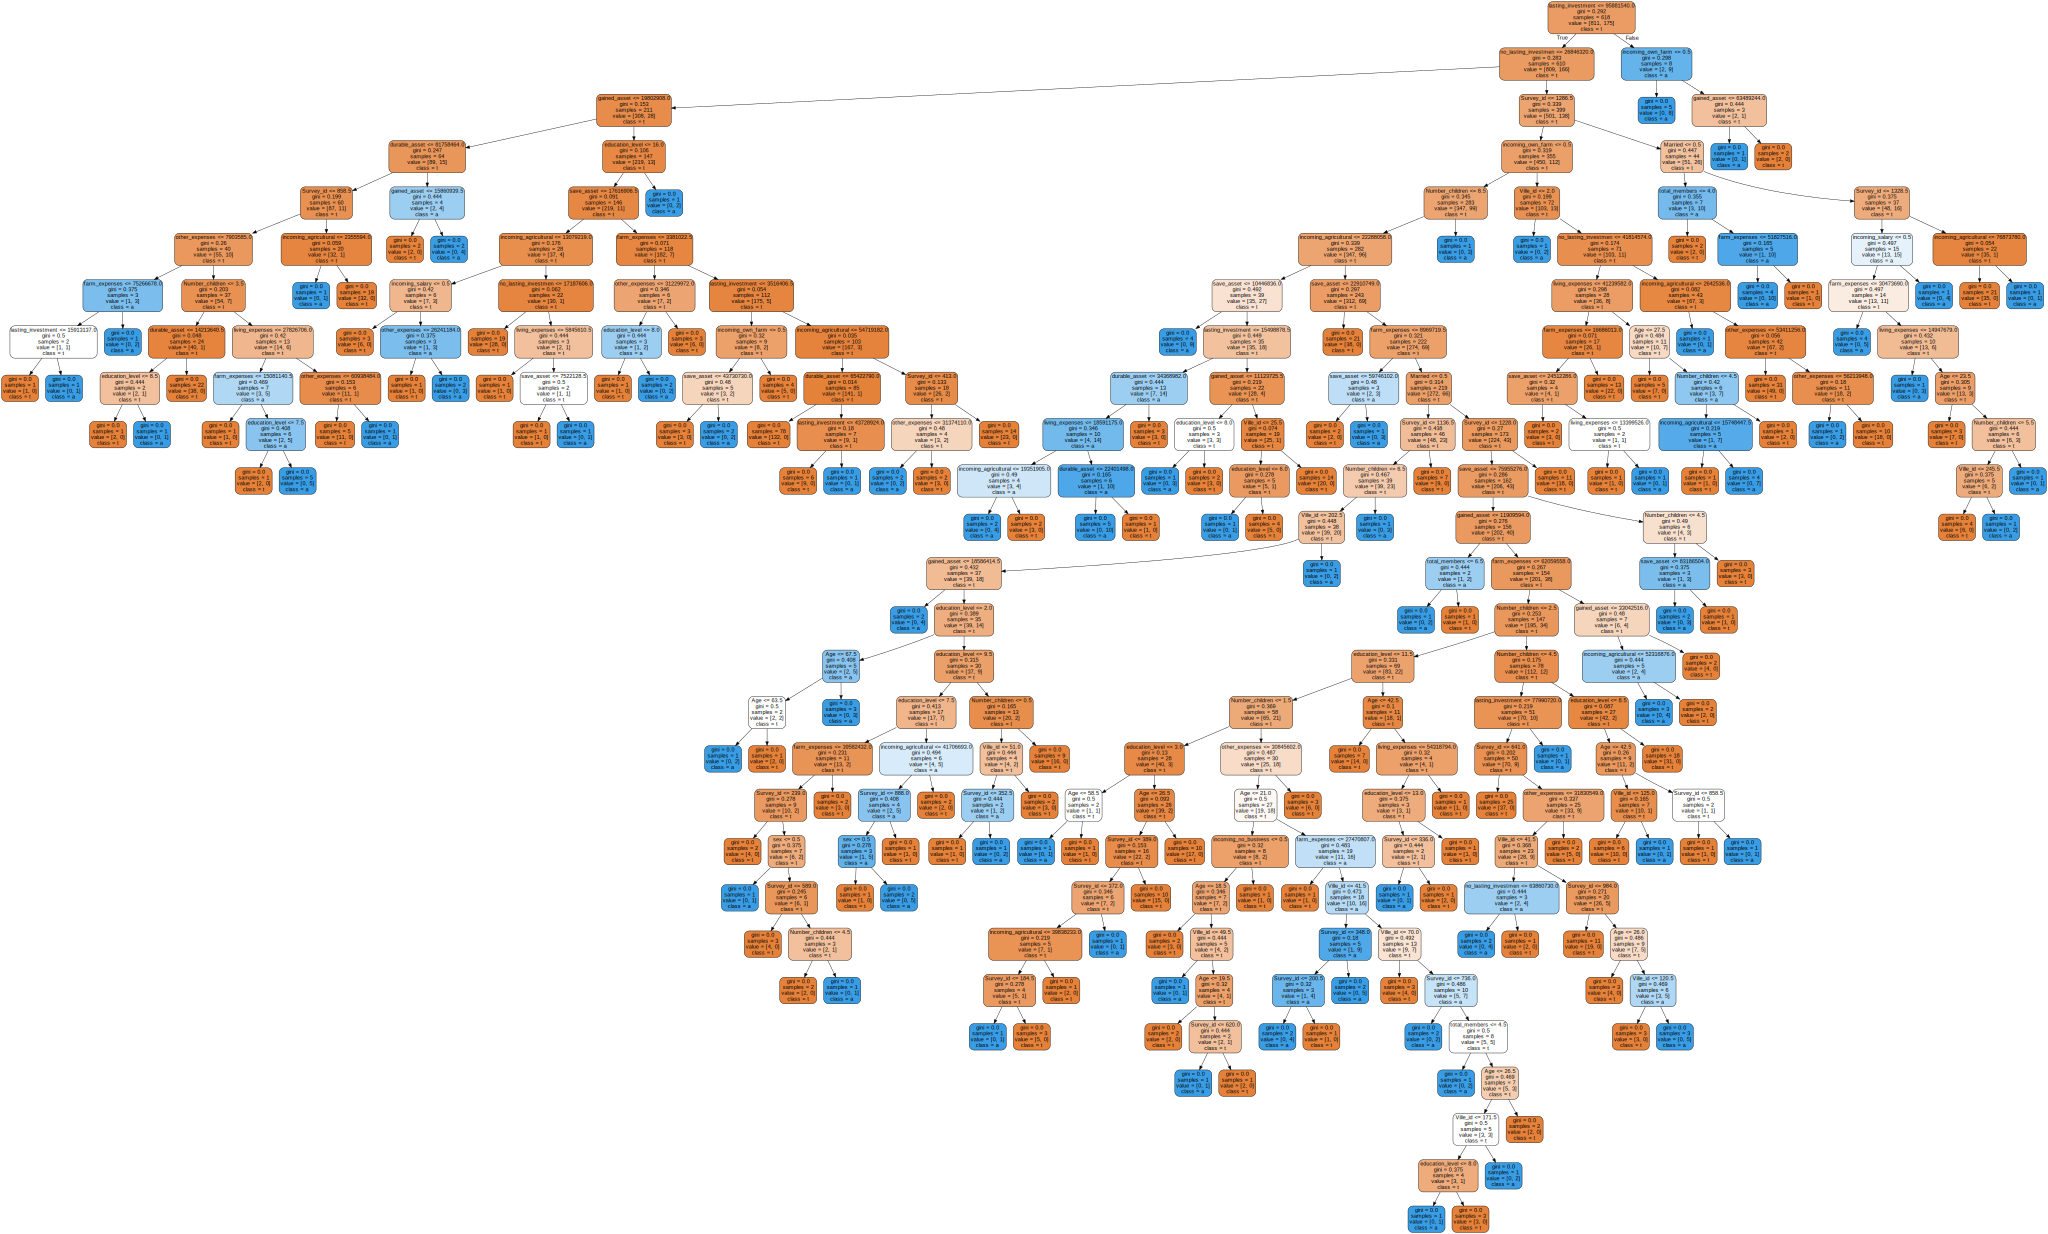

In [14]:
import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(rf_clf.estimators_[5], 
                           feature_names=feature_list,
                           class_names="target", 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

InvalidIndexError: (slice(None, None, None), 0)

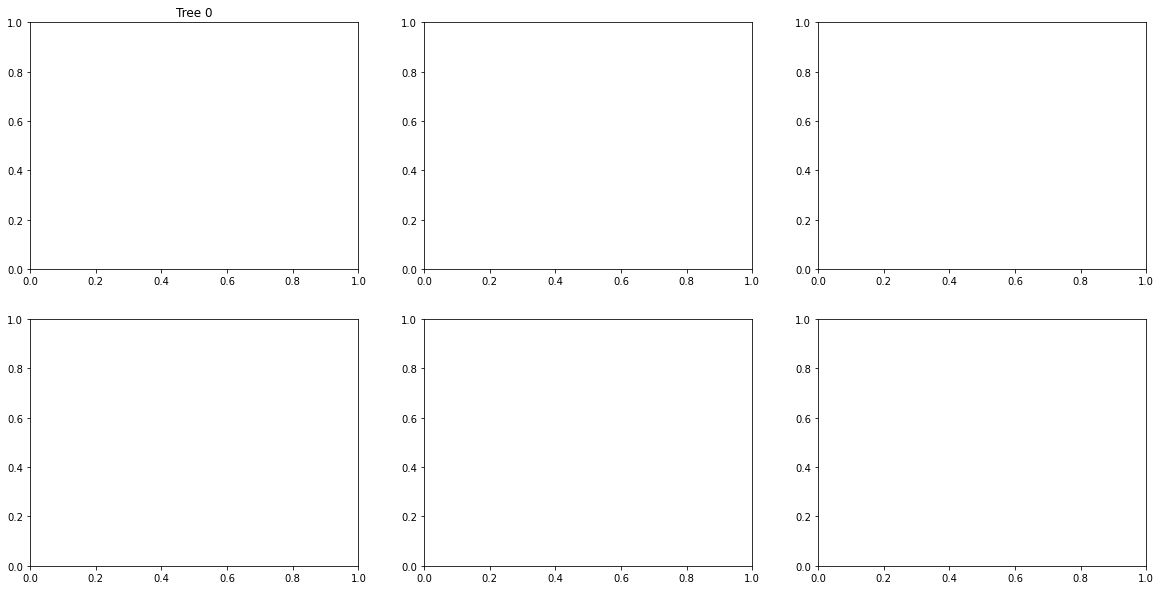

In [15]:
import mglearn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), rf_clf.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(rf_clf, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train)

In [ ]:
from sklearn import tree

# This may not the best way to view each estimator as it is small
fn=feature_list
cn="depressed"
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf_clf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')